In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df1 = pd.read_csv('heart_failure/train_val_split.csv')
df2 = pd.read_csv('heart_failure/test_split.csv')
df = df1.append(df2, ignore_index=True)

/var/folders/x4/cp03_3kj5434q3mqm3jmt96r0000gn/T/ipykernel_11707/2828611216.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, ignore_index=True)


In [27]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   37   M           ATA        130          283          0         ST     98   
2   48   F           ASY        138          214          0     Normal    108   
3   54   M           NAP        150          195          0     Normal    122   
4   39   M           NAP        120          339          0     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      0.0       Up             0  
2              Y      1.5     Flat             1  
3              N      0.0       Up             0  
4              N      0.0       Up             0  


In [28]:
continuos = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
binary = ["Sex", "FastingBS", "ExerciseAngina"]
categorical = ["ChestPainType", "RestingECG", "ST_Slope"]

In [29]:
df.shape

(918, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [31]:
df.isna().all()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [32]:
df[continuos].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


/var/folders/x4/cp03_3kj5434q3mqm3jmt96r0000gn/T/ipykernel_11707/3975040618.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

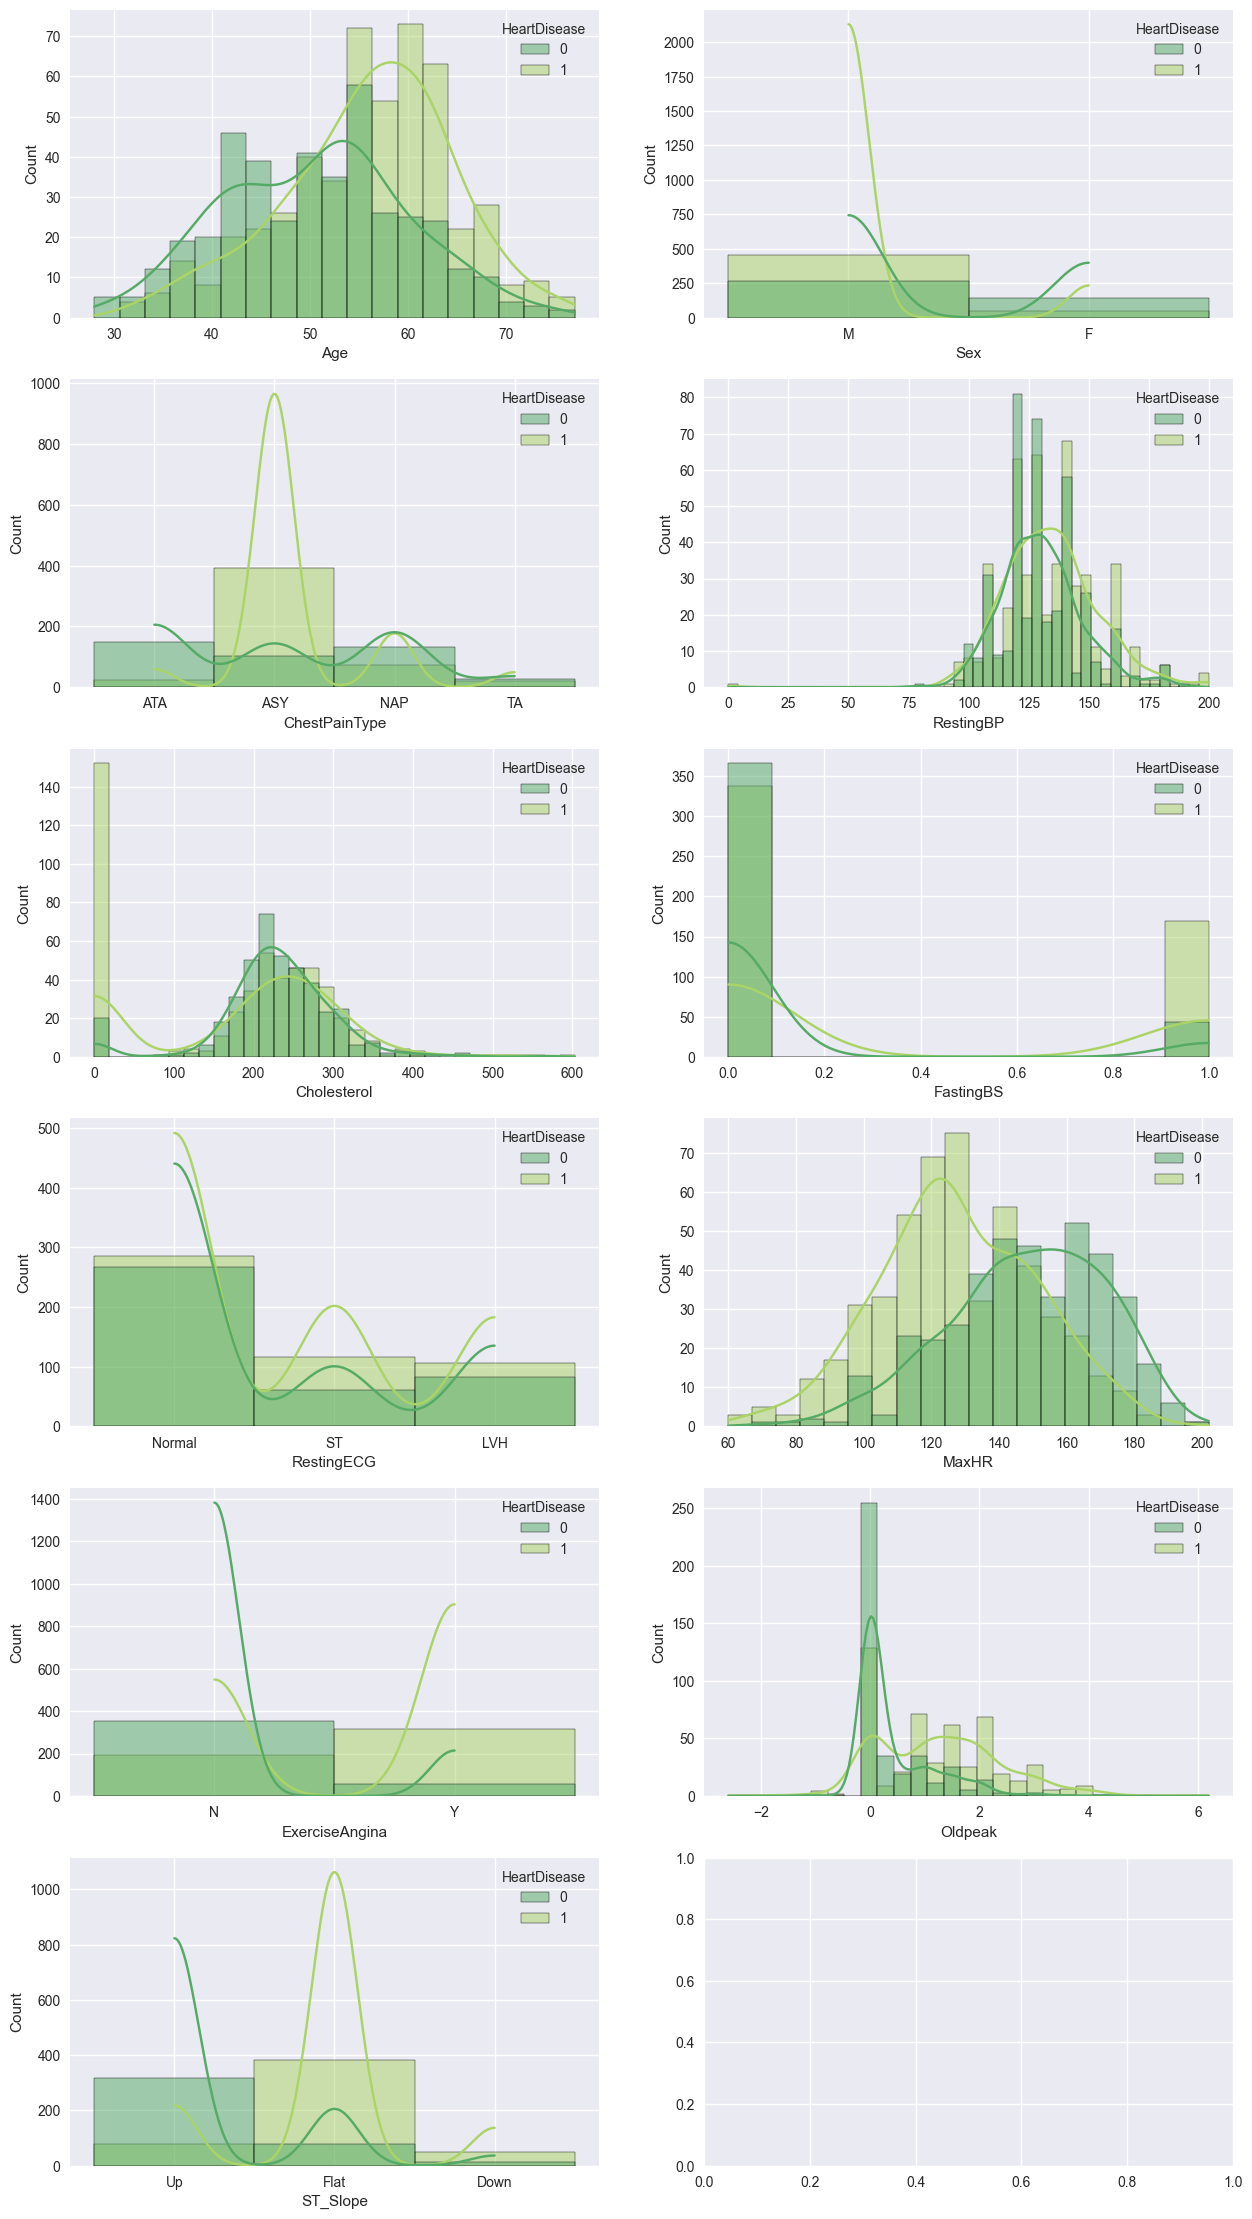

In [33]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'summer'

fig, axs = plt.subplots(6, 2, figsize=(15,28))
i=1
for feature in df.columns:
    if feature not in ["HeartDisease"] and i < 14:
        plt.subplot(6,2,i)
        sns.histplot(data=df, x=feature, kde=True, palette=color, hue='HeartDisease')
        i+=1

In [34]:
def detect_outliers(label=None):
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)
    IQR = Q3 - Q1
    interval = ((df[label] > Q1 - 1.5*IQR) & (df[label] < Q3 + 1.5*IQR))
    return df[interval], df[~interval]

In [35]:
def assign_mean(df_out, not_df_out, label=None):
    df.loc[df_out[df_out["HeartDisease"] == 0].index, label] = not_df_out[not_df_out["HeartDisease"] == 0][label].mean()
    df.loc[df_out[df_out["HeartDisease"] == 1].index, label] = not_df_out[not_df_out["HeartDisease"] == 1][label].mean()
    return

In [36]:
def delete_outliers(df_out):
    return df.drop(df_out.index)

<AxesSubplot: xlabel='Cholesterol'>

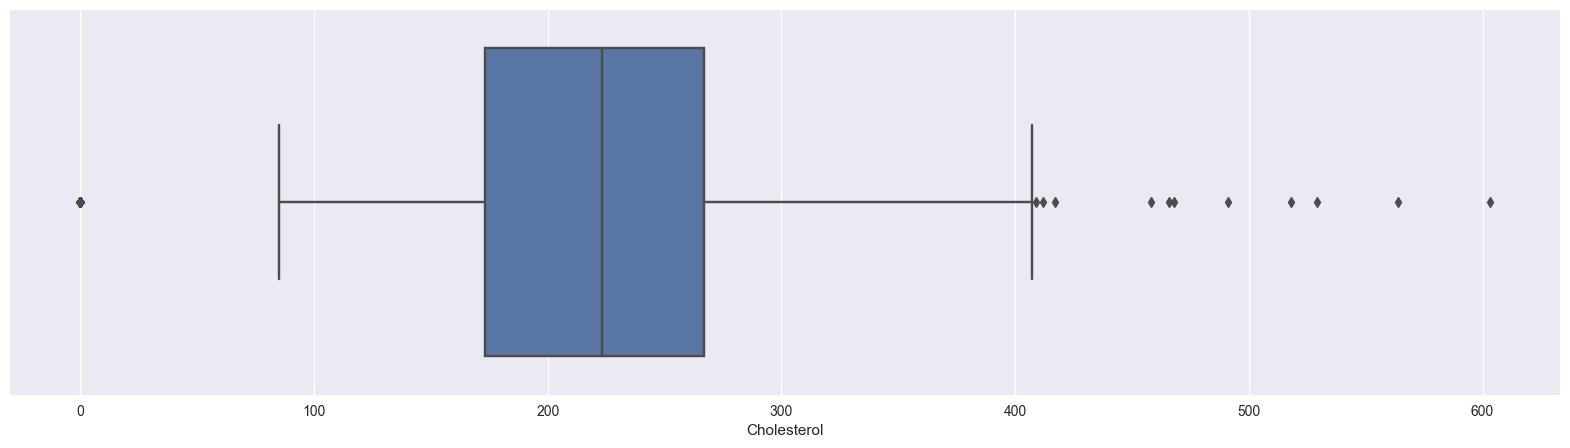

In [37]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="Cholesterol")

In [38]:
not_df_out_ch, df_out_ch = detect_outliers('Cholesterol')
print(f'Outliers in cholesterol represent the {round((df_out_ch.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_ch

Outliers in cholesterol represent the 19.93% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
24,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
26,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
59,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
64,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
201,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
883,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
889,52,M,ASY,130,0,1,Normal,120,N,0.0,Flat,1
898,60,M,ASY,160,0,0,ST,99,Y,0.5,Flat,1
901,58,M,ASY,116,0,0,Normal,124,N,1.0,Up,1


<AxesSubplot: xlabel='Cholesterol', ylabel='Count'>

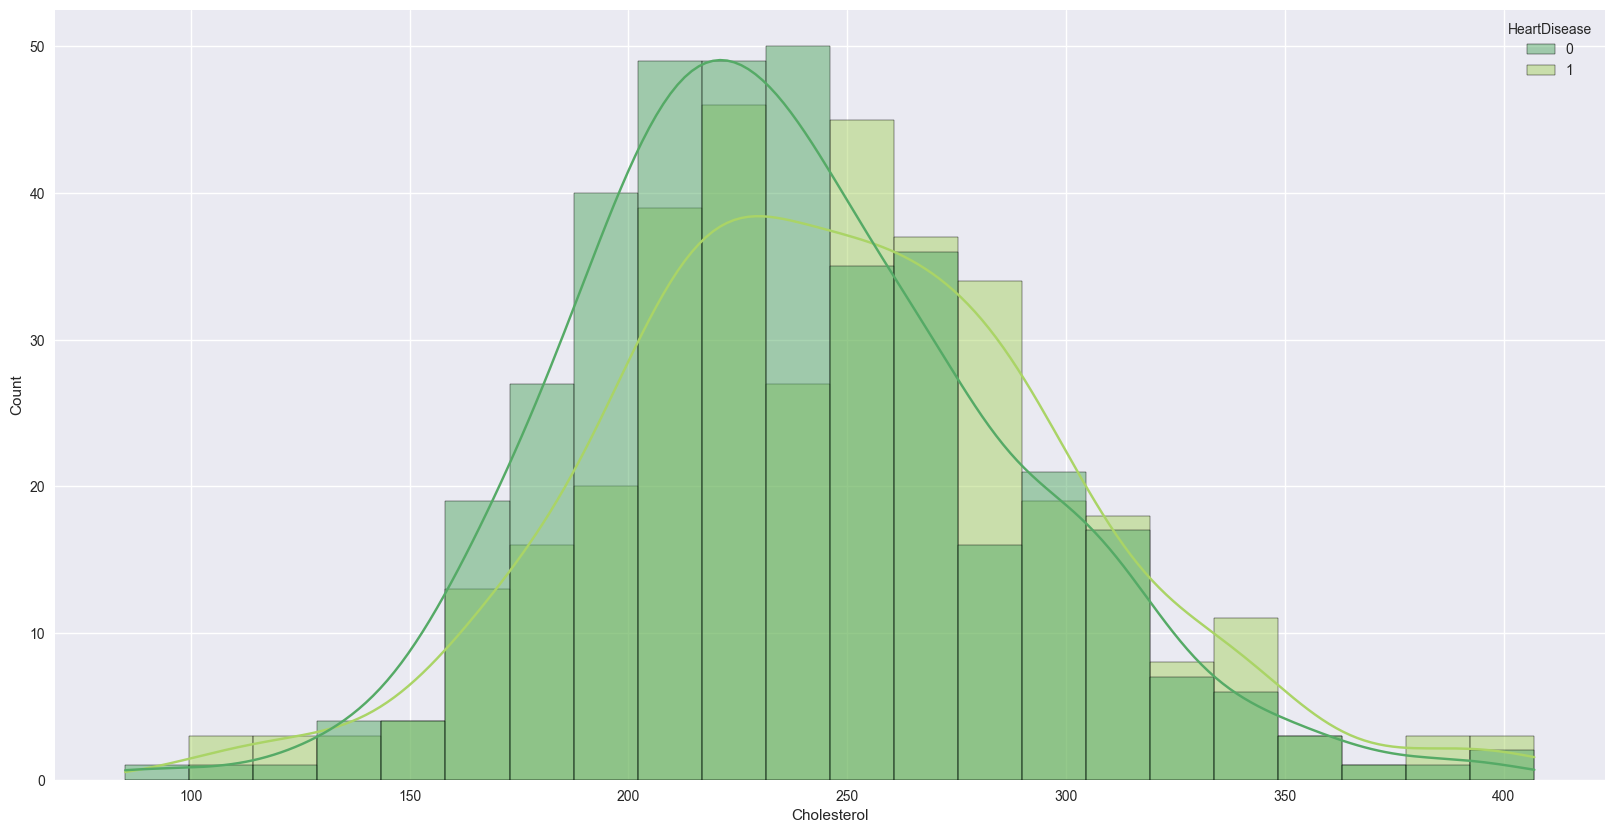

In [39]:
df = delete_outliers(df_out_ch[df_out_ch["Cholesterol"] == 0])
assign_mean(df_out_ch[df_out_ch["Cholesterol"] != 0], not_df_out_ch, 'Cholesterol')

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Cholesterol', kde=True, palette=color, hue='HeartDisease')

<AxesSubplot: xlabel='RestingBP'>

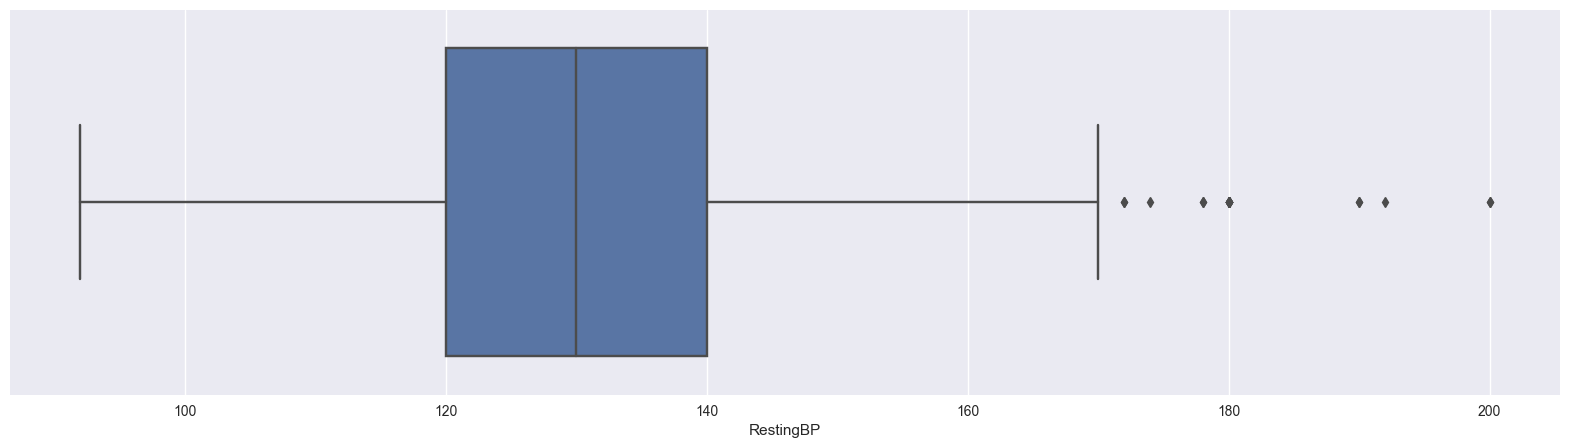

In [40]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="RestingBP")

In [41]:
not_df_out_rbp, df_out_rbp = detect_outliers('RestingBP')
print(f'Outliers in resting blood pressure represent the {round((df_out_rbp.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_rbp

Outliers in resting blood pressure represent the 4.29% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
72,65,M,ASY,170,263.0,1,Normal,112,Y,2.0,Flat,1
89,39,M,ATA,190,241.0,0,Normal,106,N,0.0,Up,0
100,58,F,ATA,180,393.0,0,Normal,110,Y,1.0,Flat,1
108,56,M,ASY,170,388.0,0,ST,122,Y,2.0,Flat,1
156,53,M,ASY,180,285.0,0,ST,120,Y,1.5,Flat,1
157,46,M,ASY,180,280.0,0,ST,120,N,0.0,Up,0
176,30,F,TA,170,237.0,0,ST,170,N,0.0,Up,0
222,45,F,ATA,180,295.0,0,Normal,180,N,0.0,Up,0
223,59,M,NAP,180,213.0,0,Normal,100,N,0.0,Up,0
225,57,F,ASY,180,347.0,0,ST,126,Y,0.8,Flat,0


<AxesSubplot: xlabel='RestingBP', ylabel='Count'>

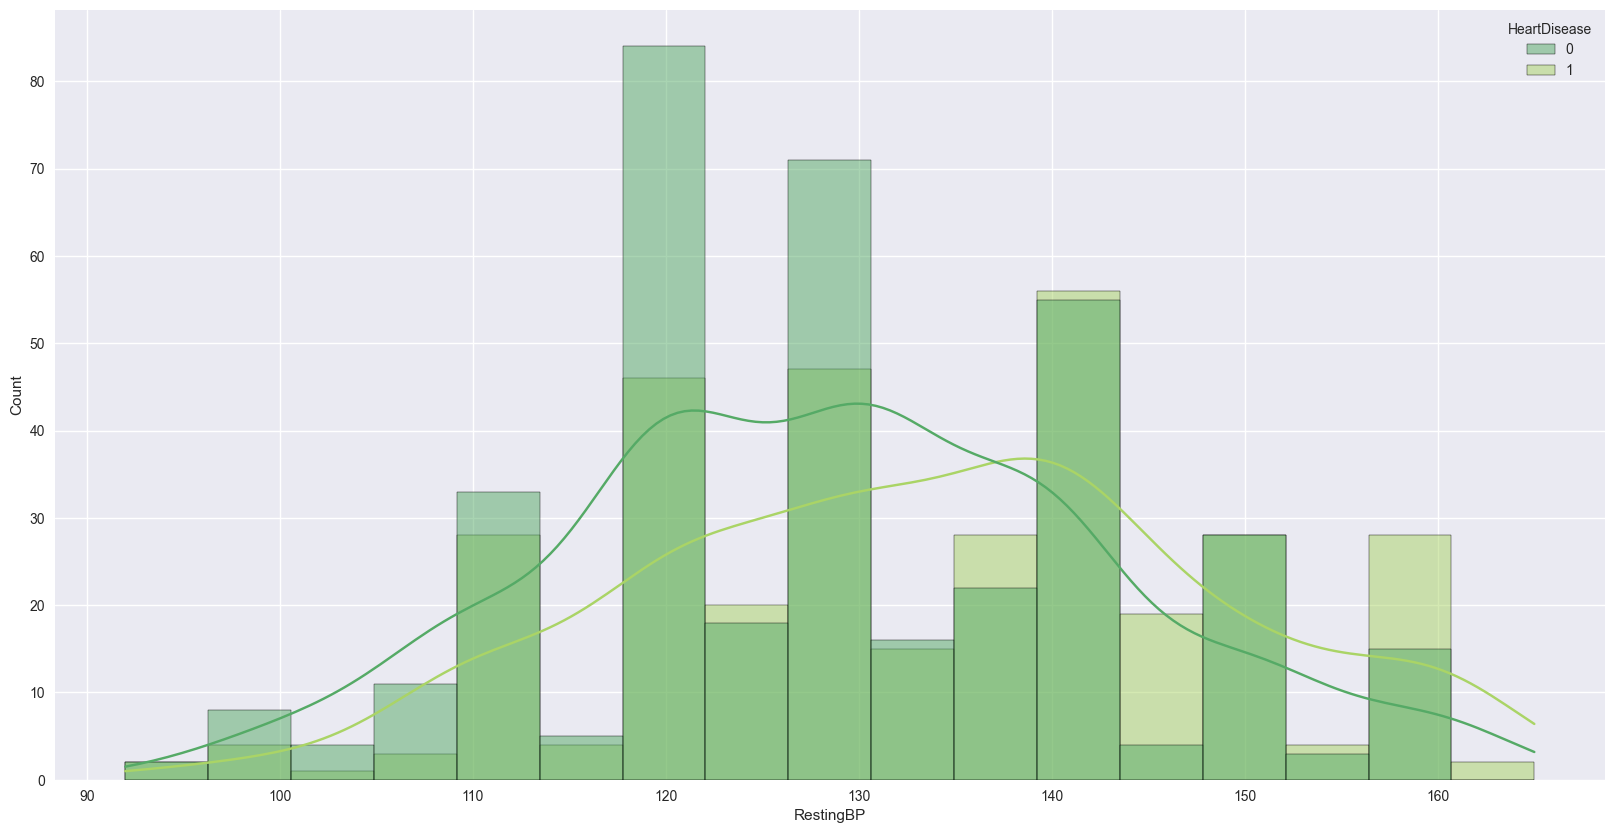

In [42]:
df = delete_outliers(df_out_rbp)
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='RestingBP', kde=True, palette=color, hue='HeartDisease')